In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("/kaggle/input/star-dataset/6 class csv.csv")

In [3]:
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [4]:
LE = LabelEncoder()

df['Star color'] = LE.fit_transform(df['Star color'])
df['Spectral Class'] = LE.fit_transform(df['Spectral Class'])

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


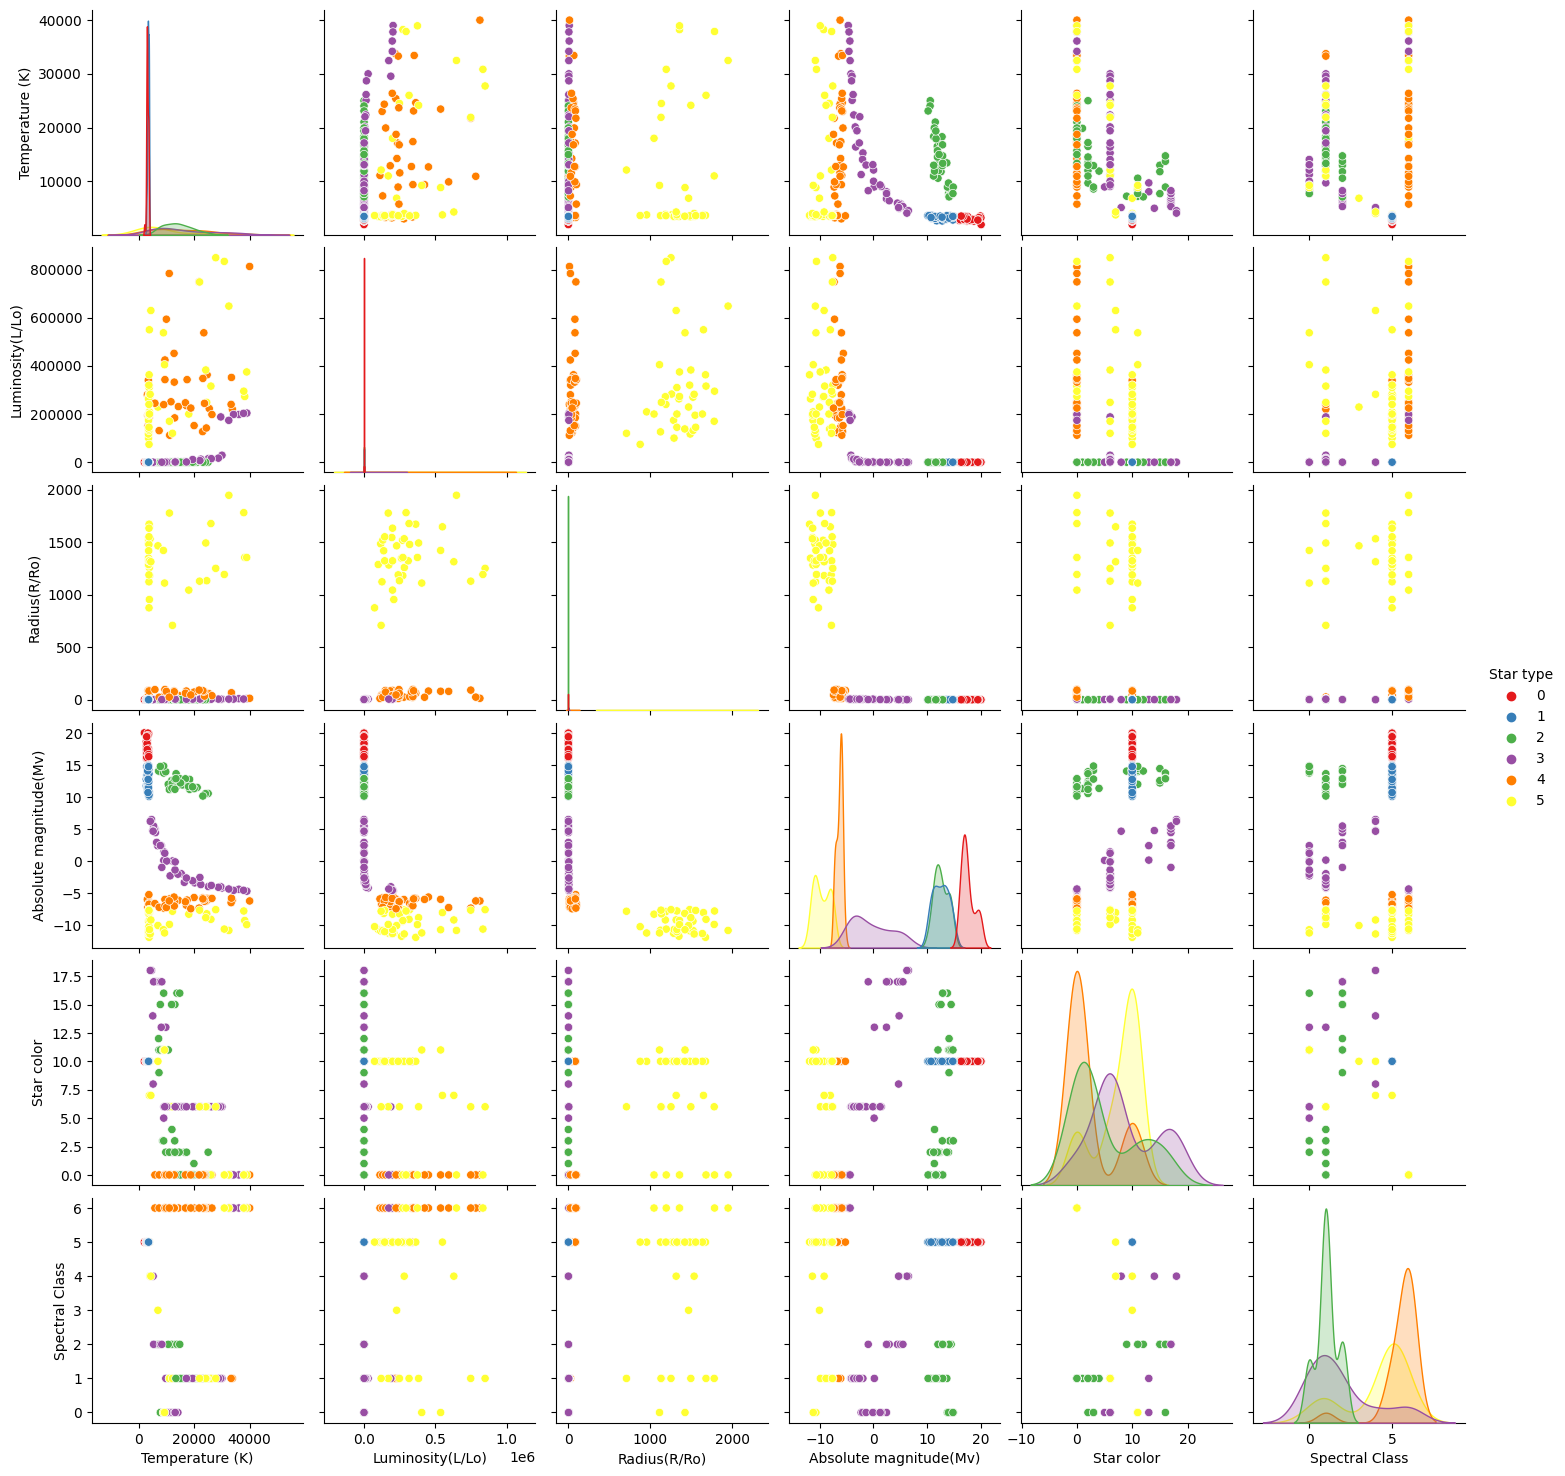

In [5]:
sns.pairplot(df,hue='Star type', palette='Set1')
plt.show()

In [6]:
X = df.drop("Star type",axis=1)
y = df["Star type"]

In [7]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [8]:
pca = PCA()
X_pca = pca.fit_transform(X_std)

In [9]:
exp_variance = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_variance)

In [10]:
# Візуалізація суми пояснених дисперсій
# Стовпчата -- лямбда на суму
# Крокова -- кумулятивні суми

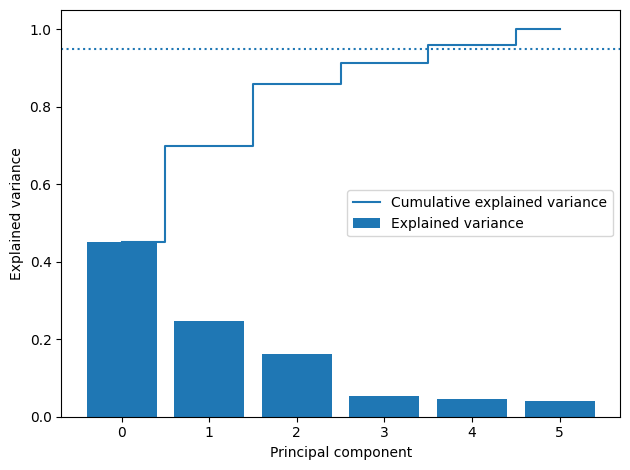

In [11]:
plt.bar(range(0,len(exp_variance)), exp_variance, align='center', label='Explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.axhline(y=0.95, linestyle=':')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [12]:
# Unsupervised learning: хочемо знайти приховані патерни в нерозмічених даних
# Задачі: кластеризація і зменшення розмірності
# Кластеризація: знайти групи подібності -- кластери, мінімізувати внутрішньо кластерну відстань 
#     / максимізувати зовнішньо кластерну відстань, або і те, і інше
# К-Means: 
#     визначаємо число кластерів, 
#     довільним чином назначаємо центроїди + центри кластерів, 
#     визначаємо належність кожної точки центру,
#     апдейтимо центроїди
#     повторюємо до збіжності
#     мінімізуємо інерцію
# Визначення к кластерів: правило ліктя

# k-means++: ініціалізуємо кластери по одному, після кожного перезважуємо решту елементів 
#     що далі -- мають більшу вагу
# n-init: кількість запусків кластеризації, мін інерція

# MiniBatchKmeans: для великого датасету
    
# Квантизація кольорів: замість неперервних значень функції ставити рівні, квантами заміняємо
    
# ЕМ алгоритм:
#     ітеративний, 2 кроки
#     на виході: ценроїди, матриця коваріації і ймовірності кластерів
#         тобто знаходимо закон розподілу
#     на вході: суміш гаусіан

# Зменшення розмірності
# Розмірність даних -- кількість фіч
# 1. Зміщуємо центроїд всередину, стандартизуємо/центруємо дані
# 2. Вводимо осі: 
#     1 вісь -- вздовж якої дані досить мінливі
#     2 -- перпендикулярна їй, найбільша величина дисперсії, що залишилася
#     ОСІ - ГОЛОВНІ КОМПОНЕНТИ
# 3.
# Нові фічі - незалежні, ортогональні
# Матриця коваріації ортогональна в базисі з власних векторів
# Знаходимо власні значення і власні вектори
# Сортуємо власні значення за спаданням і обираємо піднабір

In [13]:
# PCA (лінійний):
#     пришвидшує роботу алгоритму
#     може почистити шумові фічі
#     -> може покращити перфоманс
# tSNE (нелінійний):
#     тільки для візуалізації

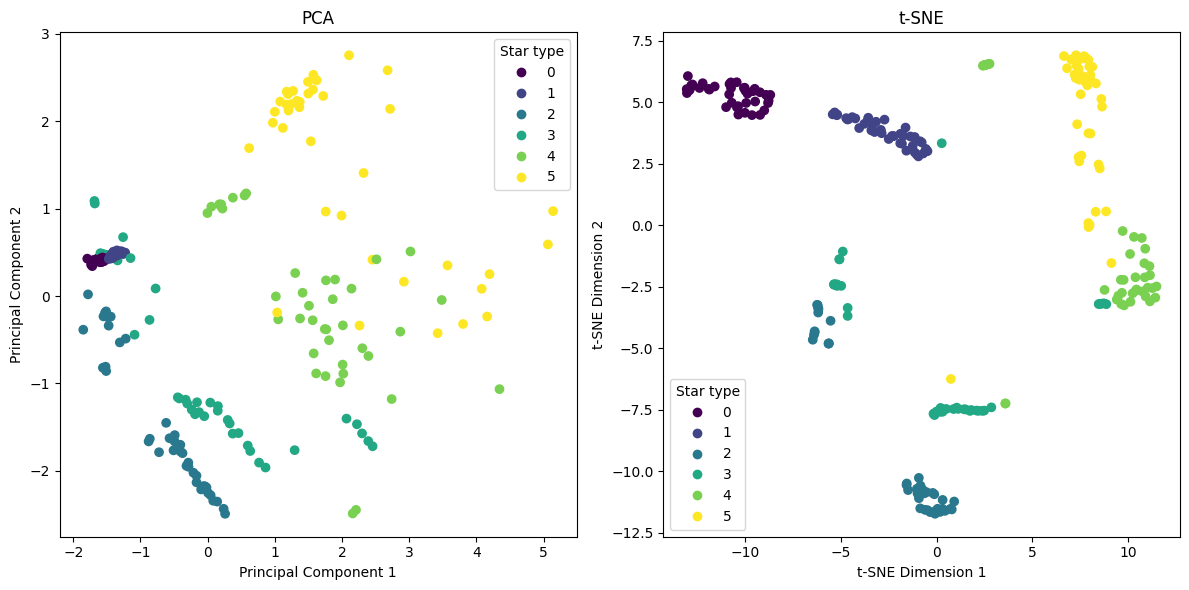

In [14]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_std)

tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(X_std)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
scatter1 = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['Star type'], cmap='viridis')
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
legend1 = plt.legend(*scatter1.legend_elements(),
                    loc="best", title="Star type")

plt.subplot(1, 2, 2)
scatter2 = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=df['Star type'], cmap='viridis')
plt.title('t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')


legend2 = plt.legend(*scatter1.legend_elements(),
                    loc="best", title="Star type")
plt.tight_layout()

plt.show()

In [15]:
from glob import glob
import random

multipleImages = glob('/kaggle/input/league-of-legends-champion-images/lol_images/**')
r = random.sample(multipleImages,1)

In [16]:
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn.metrics import pairwise_distances_argmin
from PIL import Image

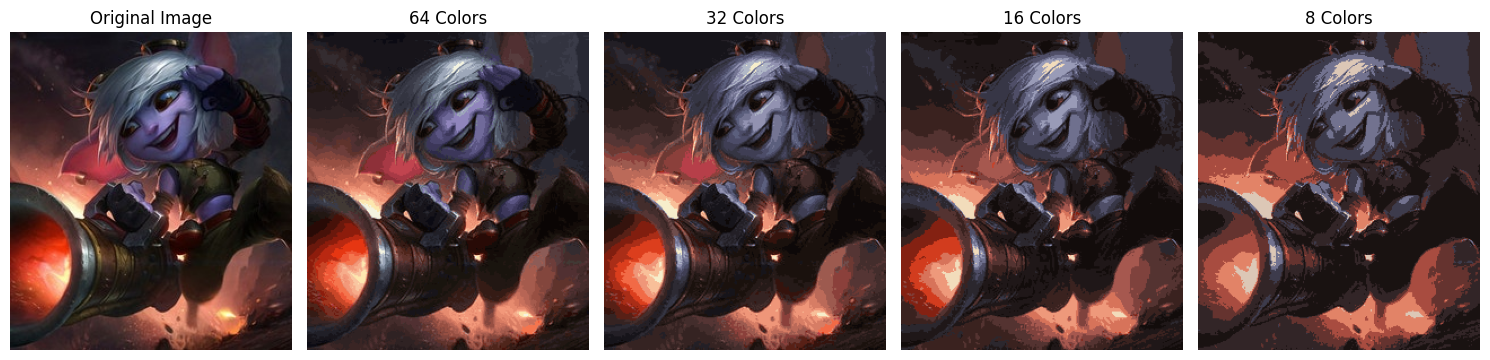

In [17]:
your_image = Image.open(r[0])  

image_array = np.array(your_image, dtype=np.float64) / 255

w, h, d = original_shape = tuple(image_array.shape)
image_array = np.reshape(image_array, (w * h, d))

n_colors_list = [64, 32, 16, 8]  

fig, axes = plt.subplots(1, len(n_colors_list) + 1, figsize=(15, 5))

axes[0].imshow(your_image)
axes[0].set_title('Original Image')
axes[0].axis('off')

for i, n_colors in enumerate(n_colors_list):
    kmeans = KMeans(n_clusters=n_colors, n_init=10, random_state=0).fit(image_array)

    labels = kmeans.predict(image_array)

    codebook_random = shuffle(image_array, random_state=0)[:n_colors + 1]
    labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)

    def recreate_image(codebook, labels, w, h):
        d = codebook.shape[1]
        image = np.zeros((w, h, d))
        label_idx = 0
        for i in range(w):
            for j in range(h):
                image[i][j] = codebook[labels[label_idx]]
                label_idx += 1
        return image

    quantized_image = recreate_image(kmeans.cluster_centers_, labels, w, h)
    axes[i + 1].imshow(quantized_image)
    axes[i + 1].set_title(f'{n_colors} Colors')
    axes[i + 1].axis('off')

plt.tight_layout()
plt.show()

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from xgboost import XGBClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
import gensim

from wordcloud import WordCloud

import re
import warnings
import time
pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [41]:
reddit_df = pd.read_csv('/kaggle/input/23k-reddit-gaming-comments-with-sentiments-dataset/23k_r_gaming_comments_sentiments.csv')

In [42]:
import string
from nltk.corpus import stopwords

def clean_text(text):
    
    stop_words = stopwords.words("english")
    
    text = text.lower()
    
    text = re.sub(r"(@\S+|https*\S+|#\S+|\d+)", " ", text)
    
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    
    text = re.sub(r"\s+", " ", text)
    
    text = text.strip()
    
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    return text

In [43]:
reddit_df['clean_com'] = reddit_df['Comment'].apply(clean_text)
reddit_df[['Comment', 'clean_com']].head(10)

,Comment,clean_com
0,Them: I don't think I like this game.\n\nMe: But you haven't even played it for 5 minutes and are still in the tutorial.,dont think like game havent even played minutes still tutorial
1,Then you leave them to farm the smaller creatures while you either wait or help them kill them all with the click of a button.,leave farm smaller creatures either wait help kill click button
2,Nothing beats the feeling you get when you see them fall in love with it just like you did all those years ago,nothing beats feeling get see fall love like years ago
3,"[Also, they're made of paper](https://i.imgur.com/wYu0G9J.jpg)\n\nEdit: I tried to make a gif and failed so here's a [video](https://i.imgur.com/aPzS8Ny.mp4)",also theyre made paper edit tried make gif failed heres video
4,"Haha... That was exactly it when my brother tried to get me into WoW. \n\nHim, "" I can run you through raids to get you to level up faster and get better gear. But first you need to be this min...",haha exactly brother tried get wow run raids get level faster get better gear first need min level lvl ok lets couple quests get quest collect apples
5,I'm going through this right now. I just started playing minecraft for the first time and my SO is having to walk me through everything.,im going right started playing minecraft first time walk everything
6,Then they get even more into it than you and end up getting all the loot and items you wanted before you. They make you look like the noob in about 3 months.,get even end getting loot items wanted make look like noob months
7,"###Take your time, you got this\n|#|user|EDIT|comment|Link\n|:--|:--|:--|:--|:--|\n|0|/u/KiwiChoppa147|[EDIT](https://i.imgur.com/OI8jNtE.png)|Then you leave them to farm the smaller creatures whi...",time got ukiwichoppa edit leave farm smaller creatures either wait help kill click buttonlinkrgamingcommentsccr c takeyourtimeyougotthisetor uleague fgamingedit beats feeling get see fall love lik...
8,"Them: ""Wait, where did you go?""\n\nMe --cleaning up the vast quantities of mobs they've managed to stumble past: "" Oh just, you know, letting you get a feel for navigation.""",wait go cleaning vast quantities mobs theyve managed stumble past oh know letting get feel navigation
9,"Don't mind the arrows, everything's fine",dont mind arrows everythings fine


In [44]:
reddit_df.clean_com = reddit_df.clean_com.apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))
reddit_df[['Comment', 'clean_com']].head(10)

,Comment,clean_com
0,Them: I don't think I like this game.\n\nMe: But you haven't even played it for 5 minutes and are still in the tutorial.,dont think like game havent even played minutes still tutorial
1,Then you leave them to farm the smaller creatures while you either wait or help them kill them all with the click of a button.,leave farm smaller creatures either wait help kill click button
2,Nothing beats the feeling you get when you see them fall in love with it just like you did all those years ago,nothing beats feeling get see fall love like years ago
3,"[Also, they're made of paper](https://i.imgur.com/wYu0G9J.jpg)\n\nEdit: I tried to make a gif and failed so here's a [video](https://i.imgur.com/aPzS8Ny.mp4)",also theyre made paper edit tried make gif failed heres video
4,"Haha... That was exactly it when my brother tried to get me into WoW. \n\nHim, "" I can run you through raids to get you to level up faster and get better gear. But first you need to be this min...",haha exactly brother tried get wow run raids get level faster get better gear first need min level lvl lets couple quests get quest collect apples
5,I'm going through this right now. I just started playing minecraft for the first time and my SO is having to walk me through everything.,going right started playing minecraft first time walk everything
6,Then they get even more into it than you and end up getting all the loot and items you wanted before you. They make you look like the noob in about 3 months.,get even end getting loot items wanted make look like noob months
7,"###Take your time, you got this\n|#|user|EDIT|comment|Link\n|:--|:--|:--|:--|:--|\n|0|/u/KiwiChoppa147|[EDIT](https://i.imgur.com/OI8jNtE.png)|Then you leave them to farm the smaller creatures whi...",time got ukiwichoppa edit leave farm smaller creatures either wait help kill click buttonlinkrgamingcommentsccr takeyourtimeyougotthisetor uleague fgamingedit beats feeling get see fall love like ...
8,"Them: ""Wait, where did you go?""\n\nMe --cleaning up the vast quantities of mobs they've managed to stumble past: "" Oh just, you know, letting you get a feel for navigation.""",wait cleaning vast quantities mobs theyve managed stumble past know letting get feel navigation
9,"Don't mind the arrows, everything's fine",dont mind arrows everythings fine


In [45]:
tokenized_comm = reddit_df.clean_com.apply(lambda x: x.split())
tokenized_comm.head()

0                                                                                                        [dont, think, like, game, havent, even, played, minutes, still, tutorial]
1                                                                                                       [leave, farm, smaller, creatures, either, wait, help, kill, click, button]
2                                                                                                                [nothing, beats, feeling, get, see, fall, love, like, years, ago]
3                                                                                                        [also, theyre, made, paper, edit, tried, make, gif, failed, heres, video]
4    [haha, exactly, brother, tried, get, wow, run, raids, get, level, faster, get, better, gear, first, need, min, level, lvl, lets, couple, quests, get, quest, collect, apples]
Name: clean_com, dtype: object

In [46]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("omw-1.4")
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/


stemmer = PorterStemmer() 
lemmatizer = WordNetLemmatizer()
tokenized_comm = tokenized_comm.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
# tokenized_comm = tokenized_comm.apply(lambda x: [lemmatizer.lemmatize(i) for i in x]) #lemmatiztion
tokenized_comm.head()

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
Archive:  /usr/share/nltk_data/corpora/wordnet.zip
replace /usr/share/nltk_data/corpora/wordnet/lexnames? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


0                                                                                                      [dont, think, like, game, havent, even, play, minut, still, tutori]
1                                                                                                  [leav, farm, smaller, creatur, either, wait, help, kill, click, button]
2                                                                                                                [noth, beat, feel, get, see, fall, love, like, year, ago]
3                                                                                                      [also, theyr, made, paper, edit, tri, make, gif, fail, here, video]
4    [haha, exactli, brother, tri, get, wow, run, raid, get, level, faster, get, better, gear, first, need, min, level, lvl, let, coupl, quest, get, quest, collect, appl]
Name: clean_com, dtype: object

In [47]:
for i in range(len(tokenized_comm)):
    tokenized_comm[i] = ' '.join(tokenized_comm[i])    
reddit_df['clean_com'] = tokenized_comm
reddit_df.head(10)

,Unnamed: 0,Comment,sentiment,clean_com
0,0,Them: I don't think I like this game.\n\nMe: But you haven't even played it for 5 minutes and are still in the tutorial.,negative,dont think like game havent even play minut still tutori
1,1,Then you leave them to farm the smaller creatures while you either wait or help them kill them all with the click of a button.,negative,leav farm smaller creatur either wait help kill click button
2,2,Nothing beats the feeling you get when you see them fall in love with it just like you did all those years ago,positive,noth beat feel get see fall love like year ago
3,3,"[Also, they're made of paper](https://i.imgur.com/wYu0G9J.jpg)\n\nEdit: I tried to make a gif and failed so here's a [video](https://i.imgur.com/aPzS8Ny.mp4)",negative,also theyr made paper edit tri make gif fail here video
4,4,"Haha... That was exactly it when my brother tried to get me into WoW. \n\nHim, "" I can run you through raids to get you to level up faster and get better gear. But first you need to be this min...",positive,haha exactli brother tri get wow run raid get level faster get better gear first need min level lvl let coupl quest get quest collect appl
5,5,I'm going through this right now. I just started playing minecraft for the first time and my SO is having to walk me through everything.,positive,go right start play minecraft first time walk everyth
6,6,Then they get even more into it than you and end up getting all the loot and items you wanted before you. They make you look like the noob in about 3 months.,positive,get even end get loot item want make look like noob month
7,7,"###Take your time, you got this\n|#|user|EDIT|comment|Link\n|:--|:--|:--|:--|:--|\n|0|/u/KiwiChoppa147|[EDIT](https://i.imgur.com/OI8jNtE.png)|Then you leave them to farm the smaller creatures whi...",positive,time got ukiwichoppa edit leav farm smaller creatur either wait help kill click buttonlinkrgamingcommentsccr takeyourtimeyougotthisetor uleagu fgamingedit beat feel get see fall love like year ago...
8,8,"Them: ""Wait, where did you go?""\n\nMe --cleaning up the vast quantities of mobs they've managed to stumble past: "" Oh just, you know, letting you get a feel for navigation.""",neutral,wait clean vast quantiti mob theyv manag stumbl past know let get feel navig
9,9,"Don't mind the arrows, everything's fine",positive,dont mind arrow everyth fine


In [48]:
# reddit_df = pd.read_csv('/kaggle/input/23k-reddit-gaming-comments-with-sentiments-dataset/cleaned_comments.csv')

In [49]:
# reddit_df = reddit_df.dropna(ignore_index=True)
# reddit_df = reddit_df.drop(columns=reddit_df.columns[0])

In [50]:
# tokenized_comm = reddit_df.comment.apply(lambda x: x.split())

# stemmer = PorterStemmer() 
# tokenized_comm = tokenized_comm.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

# for i in range(len(tokenized_comm)):
#     tokenized_comm[i] = ' '.join(tokenized_comm[i])    
# reddit_df['comment'] = tokenized_comm


In [51]:
# label_encoder = LabelEncoder()
# reddit_df['sentiment'] = label_encoder.fit_transform(reddit_df['sentiment'])

label_mapping = {'negative': -1, 'neutral': 0, 'positive': 1}

reddit_df['sentiment'] = reddit_df['sentiment'].map(label_mapping)

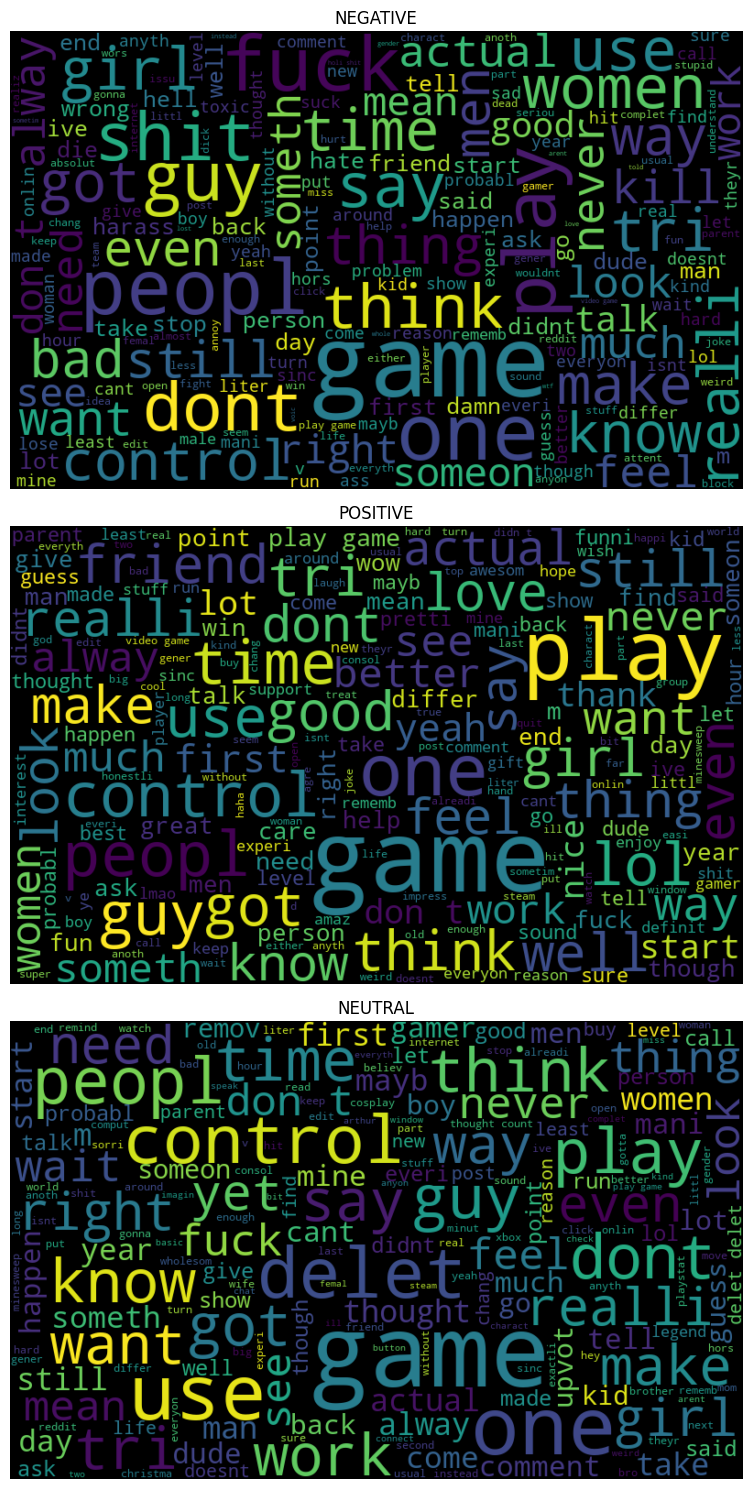

In [52]:
label_mapping = {0: 'neutral', -1: 'negative', 1: 'positive'}

labels = reddit_df['sentiment'].unique()
num_labels = len(labels)
fig, axes = plt.subplots(num_labels, 1, figsize=(15, 15))

for i, label in enumerate(labels):
    words = ' '.join([text for text in reddit_df['clean_com'][reddit_df['sentiment'] == label]])
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
    
    axes[i].imshow(wordcloud, interpolation="bilinear")
    axes[i].set_title(f'{label_mapping[label].upper()}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [53]:
X_train, X_test, y_train, y_test = train_test_split(reddit_df['clean_com'], reddit_df['sentiment'], test_size=0.2, random_state=12)

In [54]:
# TFIDF:
#     tf = кількість разів термін міститься в документі / число слів в документі (нормалізація)
#     idf = log(загальне число документів / кількість документів з цим терміном)
#     tfidf = tf*idf
# Перетворює тексти на матриці

In [55]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=3, max_features=2000, stop_words='english', ngram_range=(1, 3))#, 
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [56]:
# tokenized_red = X_train.apply(lambda x: x.split()) # tokenizing 

# word2vec_model = gensim.models.Word2Vec(
#     sentences=tokenized_red, 
#     vector_size=350, 
#     window=5, 
#     min_count=3, 
#     sg = 1,
#     hs = 0,
#     negative = 10, 
#     workers= 32,
#     seed = 34
# )

# word2vec_model.build_vocab(tokenized_red)

# # Train the model
# word2vec_model.train(tokenized_red, total_examples=word2vec_model.corpus_count, epochs=10)

# # Convert each document to the average of its word vectors
# X_train_word2vec = np.vstack([
#     np.mean([word2vec_model.wv[token] for token in doc if token in word2vec_model.wv], axis=0)
#     if any(token in word2vec_model.wv for token in doc)
#     else np.zeros(word2vec_model.vector_size)  # Use zero vector for empty documents
#     for doc in tokenized_red
# ])

# # Similarly, transform your test data
# tokenized_test = X_test.apply(lambda x: x.split())
# X_test_word2vec = np.vstack([
#     np.mean([word2vec_model.wv[token] for token in doc if token in word2vec_model.wv], axis=0)
#     if any(token in word2vec_model.wv for token in doc)
#     else np.zeros(word2vec_model.vector_size)  # Use zero vector for empty documents
#     for doc in tokenized_test
# ])

In [57]:
svm_clf =  SVC(C=10, kernel='rbf', gamma=0.1)
svm_clf.fit(X_train_tfidf, y_train)

SVC(C=10, gamma=0.1)

In [58]:
y_pred = svm_clf.predict(X_test_tfidf)

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.70      0.59      0.64       834
           0       0.79      0.84      0.81      1788
           1       0.85      0.86      0.85      2016

    accuracy                           0.80      4638
   macro avg       0.78      0.76      0.77      4638
weighted avg       0.80      0.80      0.80      4638



In [60]:
print(confusion_matrix(y_test, y_pred))

[[ 495  194  145]
 [ 128 1497  163]
 [  87  200 1729]]
